In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


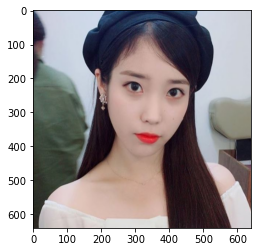

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/example.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x640의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # BRG 순을 RGB로 바꿈
plt.imshow(img_rgb)
clear_img = img_rgb.copy()
plt.show()

rectangles[[(200, 171) (468, 439)]]


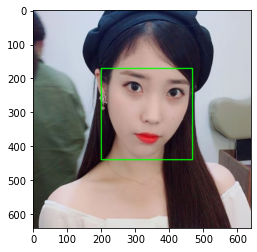

In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects: #처음에는 왜 for문이 돌지? 라고 생각했는데 얼굴이 여러개 감지되면 배열로 들어오겠구나 생각했다. 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


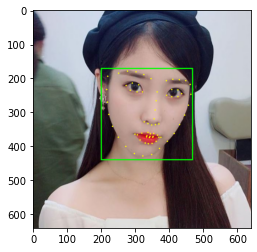

[[(219, 194), (216, 233), (218, 270), (222, 306), (233, 341), (250, 373), (272, 400), (297, 421), (322, 428), (348, 424), (371, 406), (394, 385), (414, 362), (430, 336), (445, 308), (456, 279), (463, 247), (251, 185), (277, 179), (302, 181), (325, 189), (346, 201), (391, 207), (410, 203), (429, 204), (448, 207), (461, 218), (364, 240), (361, 266), (358, 293), (355, 319), (326, 328), (337, 333), (348, 337), (359, 336), (369, 334), (273, 221), (291, 214), (310, 219), (321, 240), (305, 240), (285, 235), (392, 250), (407, 233), (425, 234), (436, 245), (425, 254), (407, 254), (299, 364), (319, 361), (337, 359), (344, 363), (354, 362), (365, 367), (375, 373), (361, 385), (349, 391), (338, 392), (329, 390), (314, 381), (306, 366), (334, 369), (343, 371), (352, 371), (369, 373), (351, 373), (341, 374), (333, 372)]]
(355, 319)
(x,y) : (355,185)
(w,h) : (269,269)
origin
355 185
x coordinates of landmarks : #2, #30, #36, #48
218 355 273 299
y coordinates of landmarks : #2, #30, #36, #48
270 319 2

In [4]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#landmark 추출하기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#landmark를 튜플을 사용해 2차원 좌표로 만든 후 얼굴 위에 출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

print(list_landmarks)
#한쪽 볼의 크기를 구하기 위해서 볼을 감싸는 랜드마크를 구했다. 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    x2 = landmark[2][0]
    y2 = landmark[2][1]
    x36 = landmark[36][0]
    y36 = landmark[36][1]
    x48 = landmark[48][0]
    y48 = landmark[48][1]
    x30 = landmark[30][0]
    y30 = landmark[30][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
#사진의 origin은 좌상단을 기준으로 한다.
print("origin")
print(list_landmarks[0][30][0], list_landmarks[0][30][1]- dlib_rect.width()//2)
print("x coordinates of landmarks : #2, #30, #36, #48")
print(x2, x30, x36, x48)
print("y coordinates of landmarks : #2, #30, #36, #48")
print(y2, y30, y36, y48)

(143, 274, 3)


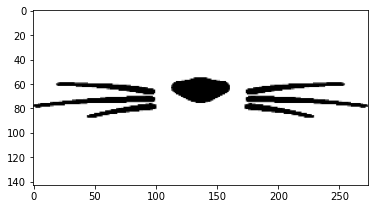

(x,y) : (218,221)
(sticker width, sticker height : (274, 143))
(640, 640, 3)
sticker shape (143, 274, 3)


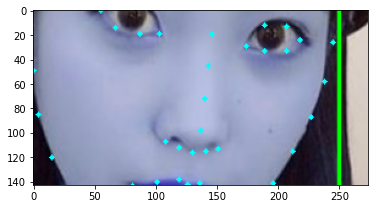

image shape (640, 640, 3)
(143, 274, 3)


In [5]:
#스티커를 불러와서 가로 세로 비율 리사이즈 해주기    
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

#볼 영역 크기 구하기 - 한쪽 볼의 bounding box를 구하고 크기를 2배로 늘린다. 
#x30 - x2
#y48 - y36

cheek_w = 2 * (x30 - x2)
cheek_h = (y48 - y36)
img_sticker = cv2.resize(img_sticker, (cheek_w,cheek_h))

print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

#스티커의 위치를 지정해주기. origin은 top-left이다
refined_x = x2  # left
refined_y = y36 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print ( '(sticker width, sticker height : (%d, %d))'%(cheek_w, cheek_h))

#원본 이미지에서 스티커를 적용할 위치를 크롭한다. 
print(img_show.shape)

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print('sticker shape',sticker_area.shape)
plt.imshow(sticker_area)
plt.show()
print('image shape',img_show.shape)
print(img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]].shape)
#이미지 가공
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

이미지 가공은 다음과 같이 이루어진다. 

내가 작업하려고 하는 영역 내에서 => img_sticker의 값이 0이 아니면(즉, 수염 부분이 아니면) -> sticker_area로 대치하라
                             img_sticker의 값이 0이면(즉, 수염부분) -> img_sticker로 대치하라 

Show All the works at once


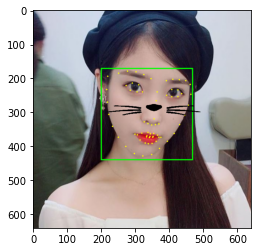

In [6]:
print("Show All the works at once")
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Show only sticker on the face


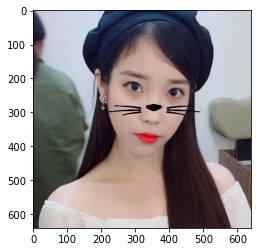

In [7]:
print("Show only sticker on the face")
sticker_area = clear_img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
clear_img2 = img_rgb
clear_img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(clear_img)
plt.show()

오늘의 과제 해보기!

합성할 이미지


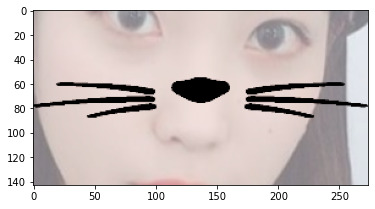

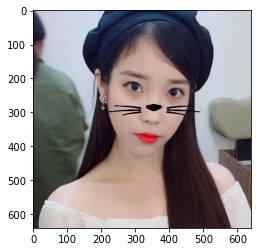

In [8]:
# 먼저 cv2.addWeighted 함수로 sticker를 붙일 부분과 스티커 이미지를 반반으로 섞는다. 
dst  = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.5, 0)
print("합성할 이미지")
plt.imshow(dst)
plt.show()

clear_img3 = clear_img2.copy()

sticker_area = clear_img2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
clear_img2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,dst).astype(np.uint8)
plt.imshow(clear_img2)
plt.show()

#### 여기서 합성한 과정
1. 준비물 
- 원본 사진(A)
- 스티커 붙일 부분(B)
- 투명도 조절한 부분(C)
- 원본 스티커(D)
2. 과정
A의 스티커 붙일 영역을 인덱스로 잡는다 -> D에서 수염이 아닌 부분에 대해서는 B로 대치하고, 수염인 부분은 C로 대치한다. 

(x,y) : (355,185)
(w,h) : (269,269)
(269, 269, 3)
(185, 269, 3)


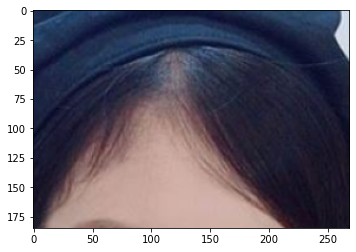

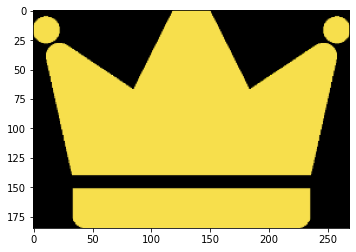

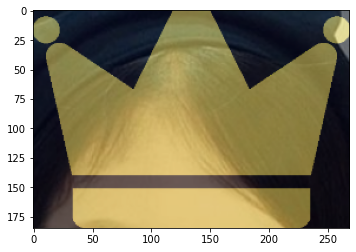

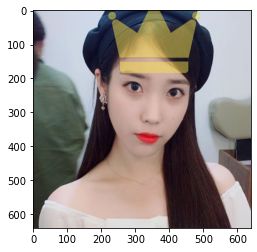

In [9]:
king_sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
king_img_sticker = cv2.imread(king_sticker_path)

head_x = list_landmarks[0][30][0]
head_y = list_landmarks[0][30][1] - dlib_rect.width()//2
print ('(x,y) : (%d,%d)'%(head_x,head_y))
print ('(w,h) : (%d,%d)'%(w,h))
king_img_sticker = cv2.resize(king_img_sticker,(w,h))
print(king_img_sticker.shape)

refined_x = head_x - w//2
refined_y = head_y - h

if(refined_y < 0):
    king_img_sticker = king_img_sticker[-refined_y:]
    print(king_img_sticker.shape)
    refined_y = 0

new_sticker_area = clear_img3[refined_y:king_img_sticker.shape[0], refined_x:refined_x+king_img_sticker.shape[1]]
plt.imshow(new_sticker_area)
plt.show()

king_img_sticker = cv2.cvtColor(king_img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(king_img_sticker)
plt.show()

dst2  = cv2.addWeighted(new_sticker_area, 0.5, king_img_sticker, 0.5, 0)
plt.imshow(dst2)
plt.show()

clear_img3[refined_y:king_img_sticker.shape[0], refined_x:refined_x+king_img_sticker.shape[1]] = \
    np.where(king_img_sticker==0,new_sticker_area,dst2).astype(np.uint8)

plt.imshow(clear_img3)
plt.show()

하얀 얼굴에 까만 걸 희미하게 올려놔도 티가 안나서, 왕관 사진으로 똑같은 과정을 반복했다. 
다만 왕관 사진은 왕관이 아닌 부분이 검정색으로 처리가 되어있어서 np.where에 들어가는 조건문을 바꾸어 줬을 뿐이다. 

다른 이미지들에 대해서도 적용해보자!
아이유의 정면 사진이 아닌 측면 사진을 썼다. 

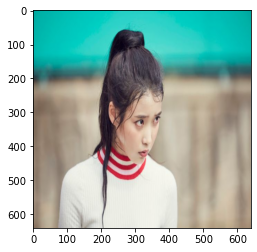

rectangles[[(268, 282) (397, 411)]]
(344, 375)
(x,y) : (344,310)
(w,h) : (130,130)
344 310
265 344 302 319
354 375 332 393
(61, 158, 3)


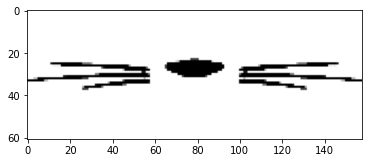

(x,y) : (265,332)
(sticker width, sticker height : (158, 61))
(640, 640, 3)
sticker shape (61, 158, 3)


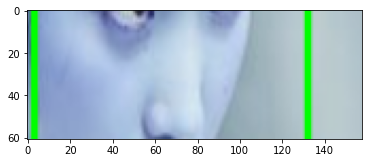

image shape (640, 640, 3)
(61, 158, 3)


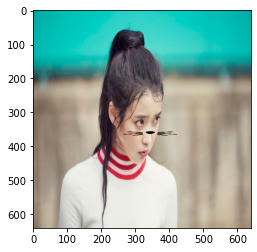

In [10]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/example2.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
clear_img = img_rgb.copy()
plt.show()

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


#landmark 추출하기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    x2 = landmark[2][0]
    y2 = landmark[2][1]
    x36 = landmark[36][0]
    y36 = landmark[36][1]
    x48 = landmark[48][0]
    y48 = landmark[48][1]
    x30 = landmark[30][0]
    y30 = landmark[30][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
print(list_landmarks[0][30][0], list_landmarks[0][30][1]- dlib_rect.width()//2)
print(x2, x30, x36, x48)
print(y2, y30, y36, y48)

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

#볼 영역 크기 구하기
#x30 - x2
#y48 - y36

cheek_w = 2 * (x30 - x2)
cheek_h = (y48 - y36)
img_sticker = cv2.resize(img_sticker, (cheek_w,cheek_h))

print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

#스티커의 위치를 지정해주기. origin은 top-left이다
refined_x = x2  # left
refined_y = y36 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print ( '(sticker width, sticker height : (%d, %d))'%(cheek_w, cheek_h))

#원본 이미지에서 스티커를 적용할 위치를 크롭한다. 
print(img_show.shape)

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print('sticker shape',sticker_area.shape)
plt.imshow(sticker_area)
plt.show()
print('image shape',img_show.shape)
print(img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]].shape)

sticker_area = clear_img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
clear_img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(clear_img)
plt.show()

#### 개선해야 할 점

해당 알고리즘은 왼쪽 볼의 크기를 구해서 단순히 2배를 곱해 얼굴의 영역을 잡기 때문에, 이렇게 대칭이 아닌 사진이 나오는 경우 얼굴 영역을 넘어 합성될 수 밖에 없다. 이를 해결하려면 다음이 필요하다. 
1. 수염 이미지 반으로 나누기
2. 왼쪽 볼 영역, 오른쪽 볼 영역 나누기
3. 각 볼 영역에 맞는 bounding box 구하기
4. 반씩 resize
5. 이미지 대치

근데 이렇게 구해도 문제는 발생한다. 스티커를 붙일 영역이 만약에 기울어져 있다면? 
이런 경우 다음과 같은 해결 과정이 필요하다. 
1. 왼쪽 볼 영역, 오른쪽 볼 영역을 나눠 bounding box를 구하되 단순 bounding box를 구하는게 아닌 minimum bounding box를 구할것(딱 해당 영역만 감싸는 rectangle 구하기)
2. (한쪽에 대해) affine 변환으로 스티커 이미지 크기 및 각도를 x축 기준으로 x축과 평행하게 회전하기
3. 원본 이미지도 affine 변환을 시도해서 x축과 평행하게 회전하기
4. 이미지 합성 (지금으로선 np.where를 쓰려면 index로 지정할 수 밖에 없어서 x축과 해당 영역이 평행해야 함)
5. 3에서 행했던 affine 변환의 역을 시도해서 다시 원본 이미지 각도로 돌려놓기
6. 나머지 한쪽에 대해서 2-5 반복. 

밝기와 거리에 대한 문제도 나온다. 
밝기의 경우 RGB를 흑백으로 바꾸어 윤곽을 최대한 뚜렷하게 만들어서 랜드마크를 찾을 수 밖에 없을 것 같고, 
거리의 경우 거리에 따라 사용하는 랜드마크의 종류를 다르게 한다. 멀리 있으면 세세한 랜드마크는 사용할 수 없으니까 좀 더 성긴 랜드마크를 쓴다. 이 경우 유령이 잡혀도 하는 수 없다. 

#### 회고

원래 하던 업이 3D 쪽이다 보니 2D 쪽이 오히려 어색했다. 3D에서 보정하려면 현실에서 점토 다루듯 휙휙 바꾸면 되는데! 그리고 이미지를 다루려면 이미지의 어떤 부분을 참고할 것인지 그 기준에 대해서 명확하게 인지하고 있어야 한다. 마지막으로 페이스북에 내 사진을 올리면 자꾸 쌍둥이의 얼굴이라고 뜨고, 애플 페이스아이디의 경우 쌍둥이가 당당히 털어가는데, 이번 노드를 학습하면서 충분히 개선할 수 있는데 안하는 걸까...내 보안은 어디갔는가 하는 분한 마음이 들었다. 거의 우리 둘 만큼 얼굴이 비슷한 사람 둘의 동영상에서 얼굴울 구분하는데 왜 정적인 사진 혹은 영상에서는 구분하지 못하는가. 애플 좀 분발해라. 